<a href="https://colab.research.google.com/github/joaoantoniocardoso/Zenite-Solar---Projeto-de-Flutuacao/blob/master/flutuador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO DE FLUTUADOR PARA EMBARCAÇÃO

## 1. Modelagem Completa

$$ m_{total com água} = m_{carga} + m_{casco} + m_{piloto} + m_{flutuador} + m_{água} $$  

$$ V_{interno} = V_{carga} + V_{piloto} + V_{flutuador} + V_{agua} $$  

$$ 
    V_{externo} = 
    V_{nucleo} + V_{interno} = 
    V_{nucleo} + V_{carga} + V_{piloto} + V_{flutuador} + V_{água}
$$  

$$ \rho_{total sem água} = \frac{m_{total sem água}}{V_{externo}} $$  
$$ \rho_{total com água} = \frac{m_{total com água}}{V_{externo}} $$  

Para flutuar com água dentro, a densidade total com água deve ser maior ou igual ao da água:

$$ \rho_{total com água} \leq \rho_{água} $$

Logo, podemos montar nossa equação para a solução do volume do flutuador em função de sua densidade:

$$
    \rho_{água} = 
    \frac{
    m_{carga} + m_{casco} + m_{piloto} + m_{flutuador} + m_{água}}
    {
    V_{carga} + V_{nucleo} + V_{piloto} + V_{flutuador} + V_{água}
    }
$$

Considerando:
$$ m_{flutuador} = \rho_{flutuador}V_{flutuador} $$  
$$ m_{água} = \rho_{água}V_{água} $$  
$$ V_{água} = V_{interno} - V_{carga} - V_{piloto} - V_{flutuador} $$

Reescrevemos:
$$
    \rho_{água} = 
    \frac{
        m_{carga} + m_{casco} + m_{piloto} + \rho_{flutuador}V_{flutuador} + \rho_{água}(V_{interno} - V_{carga} - V_{piloto} - V_{flutuador})}
    {
        V_{carga} + V_{nucleo} + V_{piloto} + V_{flutuador} + (V_{interno} - V_{carga} - V_{piloto} - V_{flutuador})
    }
$$  

Simplificando:
$$
    \rho_{água} = 
    \frac{
        m_{carga} + m_{casco} + m_{piloto} + \rho_{flutuador}V_{flutuador} + \rho_{água}(V_{interno} - V_{carga} - V_{piloto} - V_{flutuador})}
    {
        V_{nucleo} + V_{interno}
    }
$$  

$$
    \rho_{água} (V_{nucleo} + V_{interno}) = 
    m_{carga} + m_{casco} + m_{piloto} + \rho_{flutuador}V_{flutuador} + \rho_{água}(V_{interno} - V_{carga} - V_{piloto} - V_{flutuador})
$$  

$$
    \rho_{água} (V_{nucleo} + V_{interno}) = 
    m_{carga} + m_{casco} + m_{piloto} +V_{flutuador}(\rho_{flutuador} -\rho_{água}) + \rho_{água}(V_{interno} - V_{carga} - V_{piloto})
$$  

$$
    0 = 
    m_{carga} + m_{casco} + m_{piloto} +V_{flutuador}(\rho_{flutuador} -\rho_{água}) - \rho_{água}(V_{carga} + V_{piloto} + V_{nucleo})
$$  

$$
    V_{flutuador}(\rho_{água} - \rho_{flutuador}) = 
    (m_{carga} + m_{casco} + m_{piloto}) - \rho_{água}(V_{carga} + V_{piloto} + V_{nucleo})
$$  

$$
    \boxed{V_{flutuador} = 
    \frac{(m_{carga} + m_{casco} + m_{piloto}) - \rho_{água}(V_{carga} + V_{piloto} + V_{nucleo})}{(\rho_{água} - \rho_{flutuador})}}
$$  

## PROJETO

In [2]:
# MASSAS
k_sobrecarga = 0.2
m_carga = 180
m_piloto = 70
m_casco = 35
m_ar = 0 # considerando 1 ATM, 25°C, nivel do mar
m_total_com_ar = m_casco + m_piloto + m_carga + m_ar
m_total_com_ar_k = m_total_com_ar * (1 + k_sobrecarga)
print(f'Massa da Carga: {m_carga} kg')
print(f'Massa do Piloto: {m_piloto} kg')
print(f'Massa do casco: {m_casco} kg')
print(f'Massa do ar: {m_ar} kg')
print(f'Massa Total: {m_total_com_ar} kg')
print(f'Sobrecarga Considerada: {100 * k_sobrecarga} %')
print(f'Massa Total com sobrecarga: {m_total_com_ar_k} kg\n')

# VOLUMES
v_carga = 3 * 0.008065450708
v_piloto = 0
v_nucleo_casco = 0.07
v_externo_casco = 0.9
v_interno_casco = v_externo_casco - v_nucleo_casco - v_carga
print(f'Volume da Carga: {v_carga} m³')
print(f'Volume do Piloto: {v_piloto} m³')
print(f'Volume do Núcleo do Casco: {v_nucleo_casco} m³')
print(f'Volume Externo do Casco: {v_externo_casco} m³')
print(f'Volume Interno do Casco: {v_interno_casco} m³\n')

# DENSIDADES
p_agua = 1030
p_total_com_ar = m_total_com_ar_k / v_externo_casco
print(f'Densidade da Água Salgada 25°C: {p_agua} kg/m³')
print(f'Densidade do Barco Preenchido de Ar: {p_total_com_ar} kg/m³\n')

# FLUTUADOR
p_flutuador = 30
v_flutuador = ((1 + k_sobrecarga) * (m_carga + m_casco + m_piloto) - p_agua * (v_carga + v_piloto + v_nucleo_casco)) / (p_agua - p_flutuador)
m_flutuador = p_flutuador * v_flutuador

m_barco = m_carga + m_piloto + m_casco + m_flutuador

# RESULTADOS
print(f'Massa final do barco com flutuador: {m_barco}kg')
print(f'Massa do Flutuador: {m_flutuador} kg')
print(f'Densidade do Material do Flutuador: {p_flutuador}kg/m^3')
print(f'Volume do Flutuador: {v_flutuador}m^3\n')

Massa da Carga: 180 kg
Massa do Piloto: 70 kg
Massa do casco: 35 kg
Massa do ar: 0 kg
Massa Total: 285 kg
Sobrecarga Considerada: 20.0 %
Massa Total com sobrecarga: 342.0 kg

Volume da Carga: 0.024196352124000002 m³
Volume do Piloto: 0 m³
Volume do Núcleo do Casco: 0.07 m³
Volume Externo do Casco: 0.9 m³
Volume Interno do Casco: 0.8058036478760001 m³

Densidade da Água Salgada 25°C: 1030 kg/m³
Densidade do Barco Preenchido de Ar: 380.0 kg/m³

Massa final do barco com flutuador: 292.3493327193684kg
Massa do Flutuador: 7.3493327193684 kg
Densidade do Material do Flutuador: 30kg/m^3
Volume do Flutuador: 0.24497775731228m^3



## VARIANDO DENSIDADE DO FLUTUADOR

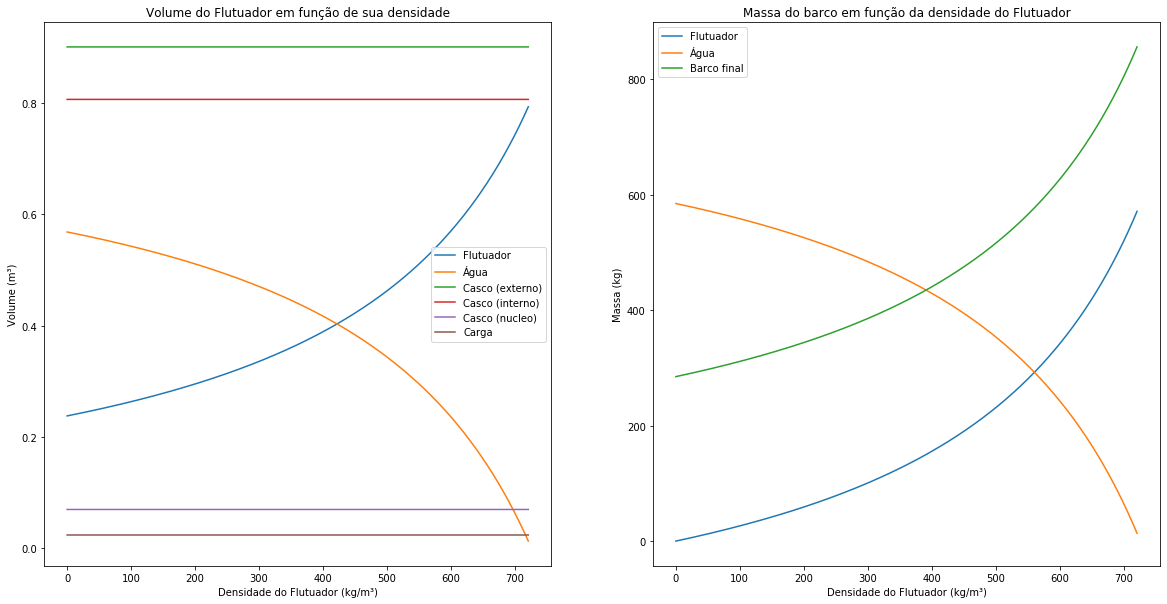

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# VARIANDO DENSIDADE DO FLUTUADOR
p_flutuador = np.arange(1, 7 * p_agua) * 0.1
v_flutuador = ((1 + k_sobrecarga) * (m_carga + m_casco + m_piloto) - p_agua * (v_carga + v_piloto + v_nucleo_casco)) / (p_agua - p_flutuador)
m_flutuador = p_flutuador * v_flutuador
m_barco = m_carga + m_piloto + m_casco + m_flutuador
v_agua = v_interno_casco - v_flutuador
m_agua = v_agua * p_agua

fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(20, 10))

ax1.set_title("Volume do Flutuador em função de sua densidade")
ax1.set_xlabel('Densidade do Flutuador (kg/m³)')
ax1.set_ylabel('Volume (m³)')
ax1.plot(p_flutuador, v_flutuador, label='Flutuador')
ax1.plot(p_flutuador, v_agua ,label='Água')
ax1.plot(p_flutuador, v_externo_casco * np.ones(p_flutuador.size), label='Casco (externo)')
ax1.plot(p_flutuador, v_interno_casco * np.ones(p_flutuador.size), label='Casco (interno)')
ax1.plot(p_flutuador, v_nucleo_casco * np.ones(p_flutuador.size), label='Casco (nucleo)')
ax1.plot(p_flutuador, v_carga * np.ones(p_flutuador.size), label='Carga')
ax1.legend()

ax2.set_title("Massa do barco em função da densidade do Flutuador")
ax2.set_xlabel('Densidade do Flutuador (kg/m³)')
ax2.set_ylabel('Massa (kg)')
ax2.plot(p_flutuador, m_flutuador, label='Flutuador')
ax2.plot(p_flutuador, m_agua ,label='Água')
ax2.plot(p_flutuador, m_barco, label='Barco final')
ax2.legend()